# K-Nearest Neighbors - Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


In [2]:
df_o = pd.read_csv("../data/processed/data_oversampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

X         Y         S         A  Orientation       Dir  Season  \
0      0.599181  0.503250  0.361275  0.163834     0.585278  0.867408     0.0   
1      0.395175  0.275784  0.681228  0.164514     0.391167  0.616671     0.0   
2      0.225216  0.502119  0.460449  0.171992     0.095194  0.438733     0.0   
3      0.273373  0.441650  0.566706  0.137322     0.415917  0.566296     0.0   
4      0.159217  0.454366  0.430933  0.080218     0.571111  0.783829     0.0   
5      0.084843  0.364510  0.563164  0.210741     0.044806  0.360961     0.0   
6      0.440510  0.522464  0.429752  0.178790     0.059806  0.392498     0.0   
7      0.832772  0.408025  0.512397  0.143440     0.009806  0.249847     0.0   
8      0.759035  0.558915  0.332940  0.189667     0.493694  0.795749     0.0   
9      0.216841  0.291890  0.645809  0.282121     0.411444  0.538955     0.0   
10     0.151934  0.377508  0.282172  0.114208     0.500556  0.812559     0.0   
11     0.198179  0.288782  0.741440  0.199184     0.152889  0.431814     0.0   
12     0.708147  0.703306  0.630460  0.177430     0.914306  0.055682     0.0   
13     0.838325  0.440802  0.593861  0.068661     0.183944  0.427230     0.0   
14     0.785162  0.603278  0.547816  0.204623     0.639333  0.965296     0.0   
15     0.372144  0.601300  0.353011  0.154317     0.043444  0.324451     0.0   
16     0.954756  0.445041  0.613932  0.217539     0.623028  0.989886     0.0   
17     0.250341  0.698502  0.611570  0.113528     0.877139  0.117616     0.0   
18     0.271734  0.543656  0.467532  0.184908     0.069972  0.358516     0.0   
19     0.226309  0.638881  0.533648  0.173351     0.971917  0.199750     0.0   
20     0.415020  0.543939  0.354191  0.175391     0.924194  0.107530     0.0   
21     0.869185  0.505793  0.520661  0.067301     0.550250  0.896860     0.0   
22     0.909877  0.516530  0.492326  0.061183     0.074361  0.327619     0.0   
23     0.897223  0.602430  0.231405  0.226377     0.522361  0.778577     0.0   
24     0.748657  0.695394  0.624557  0.167233     0.892139  0.126841     0.0   
25     0.849613  0.720543  0.691854  0.220258     0.888583  0.030119     0.0   
26     0.956668  0.482057  0.462810  0.177430     0.461639  0.873437     0.0   
27     0.434046  0.615993  0.454545  0.077498     0.478361  0.797472     0.0   
28     0.870005  0.615146  0.458087  0.104691     0.493667  0.772520     0.0   
29     0.521620  0.481775  0.570248  0.139361     0.117389  0.397472     0.0   
...         ...       ...       ...       ...          ...       ...     ...   
45034  0.102230  0.583216  0.651712  0.155676     0.724417  0.741762     0.5   
45035  0.361857  0.556372  0.400236  0.211421     0.339889  0.162656     0.5   
45036  0.643787  0.428087  0.341204  0.180150     0.442778  0.686385     0.0   
45037  0.666545  0.350381  0.512397  0.164514     0.671583  0.633593     0.5   
45038  0.764497  0.551568  0.519481  0.163154     0.871722  0.862851     0.5   
45039  0.566045  0.571913  0.558442  0.220938     0.595972  0.535816     1.0   
45040  0.424215  0.450410  0.466352  0.223657     0.821722  0.901223     0.5   
45041  0.853892  0.383724  0.397875  0.143440     0.402250  0.741206     0.0   
45042  0.530724  0.508053  0.532468  0.271244     0.712444  0.693637     0.5   
45043  0.736823  0.541396  0.327037  0.230455     0.229500  0.068074     1.0   
45044  0.753664  0.646228  0.531287  0.102651     0.805194  0.838955     0.5   
45045  0.746655  0.580107  0.508855  0.110129     0.259611  0.377410     1.0   
45046  0.249158  0.516813  0.386068  0.201224     0.312250  0.383051     0.5   
45047  0.141193  0.538853  0.680047  0.265126     0.539083  0.987969     0.0   
45048  0.205644  0.589432  0.466352  0.216859     0.968111  0.245290     0.0   
45049  0.681748  0.571913  0.563164  0.233855     0.709750  0.656071     1.0   
45050  0.304415  0.478101  0.403778  0.271244     0.319778  0.327285     1.0   
45051  0.657078  0.426392  0.536009  0.164514     0.620556  0.604279     0.5   
45052  0.57869

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31544, 19)
(13520, 19)
(31544,)
(13520,)


In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at['K-Nearest, Oversampled', 'Accuracy'] = accuracy
acc.at['K-Nearest, Oversampled', 'Precision'] = precision
acc.at['K-Nearest, Oversampled', 'Recall'] = recall
acc.at['K-Nearest, Oversampled', 'F1'] = f1
acc.to_csv("../data/external/accuracies.csv")

Accuracy: 0.731953
Precision: 0.736446
Recall: 0.730403
F1 score: 0.733412


In [9]:
# Making the confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[4911 1784]
 [1840 4985]]

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6695
           1       0.74      0.73      0.73      6825

   micro avg       0.73      0.73      0.73     13520
   macro avg       0.73      0.73      0.73     13520
weighted avg       0.73      0.73      0.73     13520



In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
# calculate min, max and limits
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
# np.arange(y_min, y_max, h))

In [12]:
knnvals={}
for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knnvals[i]=accuracy
    
dfknn = pd.DataFrame.from_dict(knnvals, orient="index", columns=['acc'])
dfknn

acc
1   0.868861
2   0.818565
3   0.767973
4   0.731953
5   0.714275
6   0.691346
7   0.682396
8   0.667382
9   0.664053
10  0.661391
11  0.659467
12  0.658136
13  0.659985
14  0.653920
15  0.653846
16  0.649334
17  0.648225
18  0.646820
19  0.640385
20  0.639571

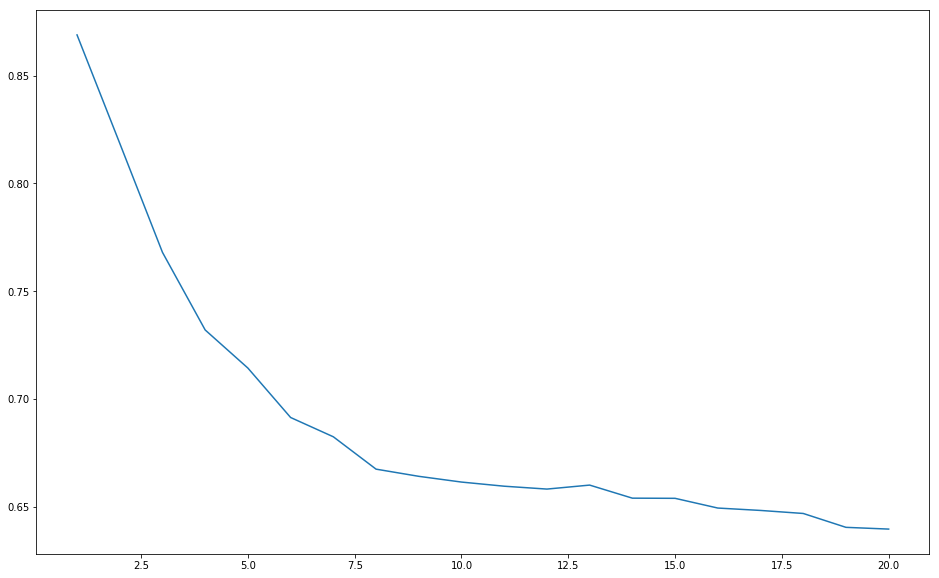

In [13]:
plt.figure(figsize=(16, 10))
plt.plot(dfknn, scalex=range(1,21))
